In [1]:
# -*- coding: utf-8 -*-

In [2]:
from __future__ import division, print_function, unicode_literals, absolute_import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from time import time

In [2]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [3]:
from sklearn.datasets import load_iris

In [4]:
from sklearn.cross_validation import train_test_split, StratifiedShuffleSplit, StratifiedKFold

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
from matching import Matching
from rail import Path, Rail
from xml_loader import load, xml_dump

In [6]:
import pickle, os

In [8]:
obj_path = 'D:/CMC_MSU/master/science/data/train_data_merge'
fnames = [obj_path + '/' + x for x in os.listdir(obj_path)]
y = [1 if name.endswith('.def') else -1 for name in fnames]
defects = np.where(np.array(y) == 1)[0]

In [9]:
defects

array([ 12,  37,  38,  39,  48,  78,  96, 126, 153, 160, 161, 169, 189,
       197, 198, 199, 202, 242, 249, 252, 274, 278, 288, 290, 300, 304, 305], dtype=int64)

In [9]:
cl = Classifier('D:/CMC_MSU/master/science/data/train_data_merge')
k = kernel.Kernel()
obj_list = [load(fname) for fname in cl.file_list]
# y = np.array([1. if name.endswith('.def') else -1. for name in cl.file_list])
# X = np.array([cl.preprocess_object(obj.rails[0]) for obj in obj_list])
y = [1. if name.endswith('.def') else -1. for name in cl.file_list]
X = [cl.preprocess_object(obj.rails[0]) for obj in obj_list]
trainer = svm.SVMTrainer(kernel=k.mykernel(), c=1.0)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
obj_list = [Classifier.preprocess_object(obj.rails[0]) for obj in [load(name) for name in fnames]]

In [190]:
fnames_trunc = [name.split('/')[-1].split('_')[0].split('-')[1] for name in fnames]

In [135]:
def kernel_SVM_learn(kern, y, C=1.0):
    N = len(y)
    n_samples = N
#     P = matrix(np.dot(np.dot(np.diag(y), kern), np.diag(y)))
    P = matrix(np.outer(y,y) * kern)
#     G = matrix([([1.0] * N)] * N)
#     h = matrix([C] * N)
    G_std = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
    h_std = cvxopt.matrix(np.zeros(n_samples))

    # a_i \leq c
    G_slack = cvxopt.matrix(np.diag(np.ones(n_samples)))
    h_slack = cvxopt.matrix(np.ones(n_samples) * C)
    G = cvxopt.matrix(np.vstack((G_std, G_slack)))
    h = cvxopt.matrix(np.vstack((h_std, h_slack)))
    b = matrix(0.0)
    q = matrix(-1 * np.ones(N))
    A = matrix([float(_y) for _y in y], (1, N))
    sol = solvers.qp(P, q, G, h, A, b)
    return sol

In [136]:
svm_sol = kernel_SVM_learn(data2, y)

     pcost       dcost       gap    pres   dres
 0: -1.5814e+02 -8.9545e+02  6e+03  4e+00  1e-15
 1: -1.1483e+02 -6.6192e+02  2e+03  1e+00  1e-15
 2: -5.8249e+01 -2.4049e+02  2e+02  4e-02  9e-15
 3: -5.7189e+01 -7.6834e+01  2e+01  4e-03  2e-15
 4: -5.7481e+01 -7.6948e+01  2e+01  3e-03  2e-15
 5: -5.8043e+01 -7.6186e+01  2e+01  3e-03  1e-15
 6: -5.8536e+01 -7.4950e+01  2e+01  2e-03  1e-15
 7: -5.9182e+01 -7.3243e+01  1e+01  1e-03  8e-16
 8: -6.0279e+01 -6.9386e+01  9e+00  6e-04  4e-16
 9: -6.0292e+01 -6.9073e+01  9e+00  4e-04  4e-16
10: -6.0704e+01 -6.8562e+01  8e+00  4e-04  4e-16
11: -6.1526e+01 -6.7395e+01  6e+00  2e-04  3e-16
12: -6.1801e+01 -6.7089e+01  5e+00  2e-04  3e-16
13: -6.2167e+01 -6.6087e+01  4e+00  8e-05  3e-16
Terminated (singular KKT matrix).


In [201]:
np.array(fnames_trunc)[[169,242]]

array(['26', '41'], 
      dtype='<U2')

In [109]:
test = pd.DataFrame(data1).fillna(0)

In [125]:
list(test.values)

311

In [128]:
data2.shape

(308, 308)

In [151]:
defect_distances = pd.DataFrame(data4)[list(defects)].iloc[list(defects)]

In [ ]:
defect_distances[defect_distances>0.1]

In [158]:
np.sum(data4.ravel() == 1)

2264

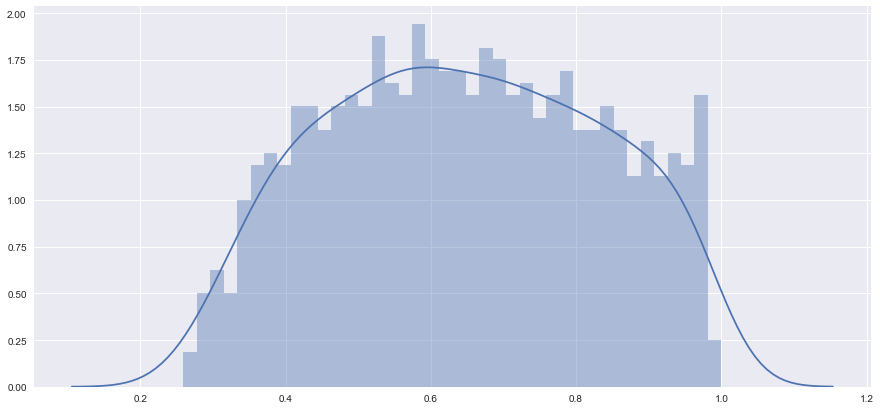

In [161]:
plt.figure(figsize=(15,7))
_ = sns.distplot(np.unique(data4.ravel()), bins=40)

In [198]:
np.percentile(np.unique(data2.ravel()), 25)

0.0096173990849814078

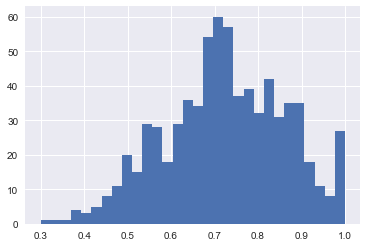

In [152]:
_ = plt.hist(np.array(defect_distances).ravel(), bins=30)

In [197]:
np.percentile(np.array(defect_distances).ravel(), 50)

0.012050647649541552

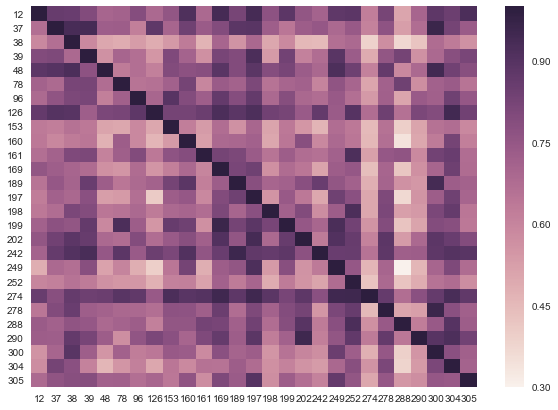

In [153]:
plt.figure(figsize=(10,7))
sns.heatmap(defect_distances)

In [132]:
len(y)

311

In [131]:
len(y1)

308

In [11]:
N = data.shape[0]

In [13]:
def custom_kernel(X, Y):
    table = matching.get_distance_table(X, Y, 2, 5)
    dist = matching.gpu_match(dist_matr[i][j], distance=True)
    return dist

In [16]:
clf = SVC(kernel=custom_kernel)

In [54]:
np.array(y).count()

(311,)

In [51]:
clf.score(X)

<bound method ClassifierMixin.score of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel=<function custom_kernel at 0x0000026412825840>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)>

### rename defects

In [184]:
obj_path = 'D:/CMC_MSU/master/science/data/def_cut/'
def_fnames = [obj_path + '/' + x for x in os.listdir(obj_path)]

In [187]:
for name in def_fnames:
    if name.endswith('.def'):
        os.rename(name, name[:-4])

### SKlearn

In [10]:
from sklearn.svm import SVC
import os

In [11]:
matching = Matching(5)

In [12]:
def preprocess_object(obj):
    # assert obj==Rail
    for i, point in enumerate(obj.points):
        if 4 in point.channels:
            point.channels[2].signals = [sig for sig in point.channels[4].signals]
        if 5 in point.channels:
            point.channels[2].signals = [sig for sig in point.channels[5].signals]
        for ch in [0,1,3,4,5,6,7]:
            if ch in point.channels:
                point.channels.pop(ch, None)
    return obj

In [13]:
# cl = Classifier('D:/CMC_MSU/master/science/data/train_data_merge')
obj_path = 'D:/CMC_MSU/master/science/data/train_data_merge'
file_list = [obj_path + '/' + name for i, name in enumerate(os.listdir(obj_path))]
obj_list = [load(fname) for fname in file_list]
# y = np.array([1. if name.endswith('.def') else -1. for name in cl.file_list])
# X = np.array([cl.preprocess_object(obj.rails[0]) for obj in obj_list])
y = [1. if name.endswith('.def') else -1. for name in file_list]
X = [preprocess_object(obj.rails[0]) for obj in obj_list]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [15]:
def my_ker():
    alpha = 0.01
    return lambda x, y: \
        np.exp(- alpha * self.matching.gpu_match(self.matching.get_distance_table(x, y, 2, 5), distance=True))

In [17]:
def train_gram_matrix(X, _print=False):
    alpha = 0.005
    n_samples = len(X)
    K = np.zeros((n_samples, n_samples))
    # TODO(tulloch) - vectorize

    start = time()
    print('Sample len:', len(X))
    for i, x_i in enumerate(X):
        for j, x_j in enumerate(X):
            if i < j:
                K[i, j] = np.exp(- alpha * matching.gpu_match(matching.get_distance_table(x_i, x_j, 2, 5), distance=True))
                K[j, i] = K[i, j]
            elif i == j:
                K[i, j] = 1.
        if i % 100 == 0:
            print(i, time() - start)
            start = time()
    print('Kernel calculation finished')
    return K

def test_gram_matrix(x_test, x_train, _print=False):
    alpha = 0.005
    n_samples = len(x_test)
    m = len(x_train)
    K = np.zeros((n_samples, m))
    # TODO(tulloch) - vectorize

    start = time()
    print('Sample len:', len(x_test))
    for i, x_i in enumerate(x_test):
        for j, x_j in enumerate(x_train):
                K[i, j] = np.exp(- alpha * matching.gpu_match(matching.get_distance_table(x_i, x_j, 2, 5), distance=True))
        if i % 100 == 0:
            print(i, time() - start)
            start = time()
    print('Kernel calculation finished')
    return K

In [18]:
train_k = train_gram_matrix(X_train)

Sample len: 214
0 0.6957008838653564
100 47.99177384376526
200 17.13719367980957
Kernel calculation finished


In [19]:
test_k = test_gram_matrix(X_test, X_train)

Sample len: 92
0 0.7863452434539795
Kernel calculation finished


In [20]:
np.where(np.array(y_test)==1.0)

(array([ 0, 11, 12, 27, 42, 54, 75], dtype=int64),)

In [21]:
w_train = [0.1 if y==1 else 1 for y in y_train]
fitted = clf.fit(train_k, y_train, sample_weight=w_train)

In [22]:
w_test = [0.1 if y==1 else 1 for y in y_test]
fitted.score(test_k, y_test, w_test)

0.99183197199533257

In [100]:
def calc_auc(x,y,fitted):
    probas = fitted.predict_proba(x)
    fpr, tpr, thresholds = roc_curve(y, probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    return roc_auc, fpr, tpr

In [258]:
# w_train = [0.1 if y==-1 else 1 for y in y_train]
clf = SVC(kernel=str('precomputed'), C=0.5, class_weight={1: 1, -1: 0.1}, random_state=2)
clf.probability = True
fitted = clf.fit(train_k, y_train)#, sample_weight=w_train)
# probas = fitted.predict_proba(test_k)
# fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
# roc_auc  = auc(fpr, tpr)
# print(roc_auc)
roc_train, fpr_train, tpr_train = calc_auc(train_k, y_train, fitted)
roc_test, fpr_test, tpr_test = calc_auc(test_k, y_test, fitted)

In [259]:
roc_train, roc_test

(0.63659793814432986, 0.65210084033613436)

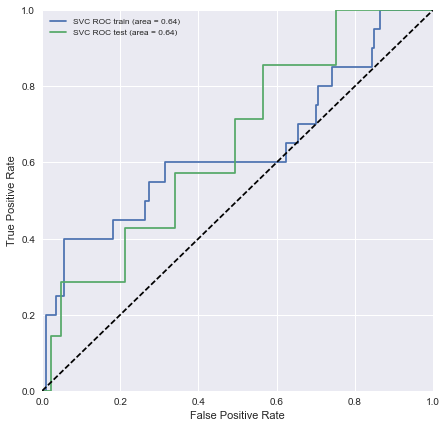

In [262]:
plt.figure(figsize=(7,7))
_ = plt.plot(fpr_train, tpr_train, label='%s ROC train (area = %0.2f)' % ('SVC', roc_train))
_ = plt.plot(fpr_test, tpr_test, label='%s ROC test (area = %0.2f)' % ('SVC', roc_train))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()

In [21]:
np.where(np.array(y_train)==1.0)

(array([ 12,  13,  23,  45,  47,  50,  51,  60,  75,  81,  91, 142, 145,
        164, 165, 169, 193, 206, 207, 212], dtype=int64),)

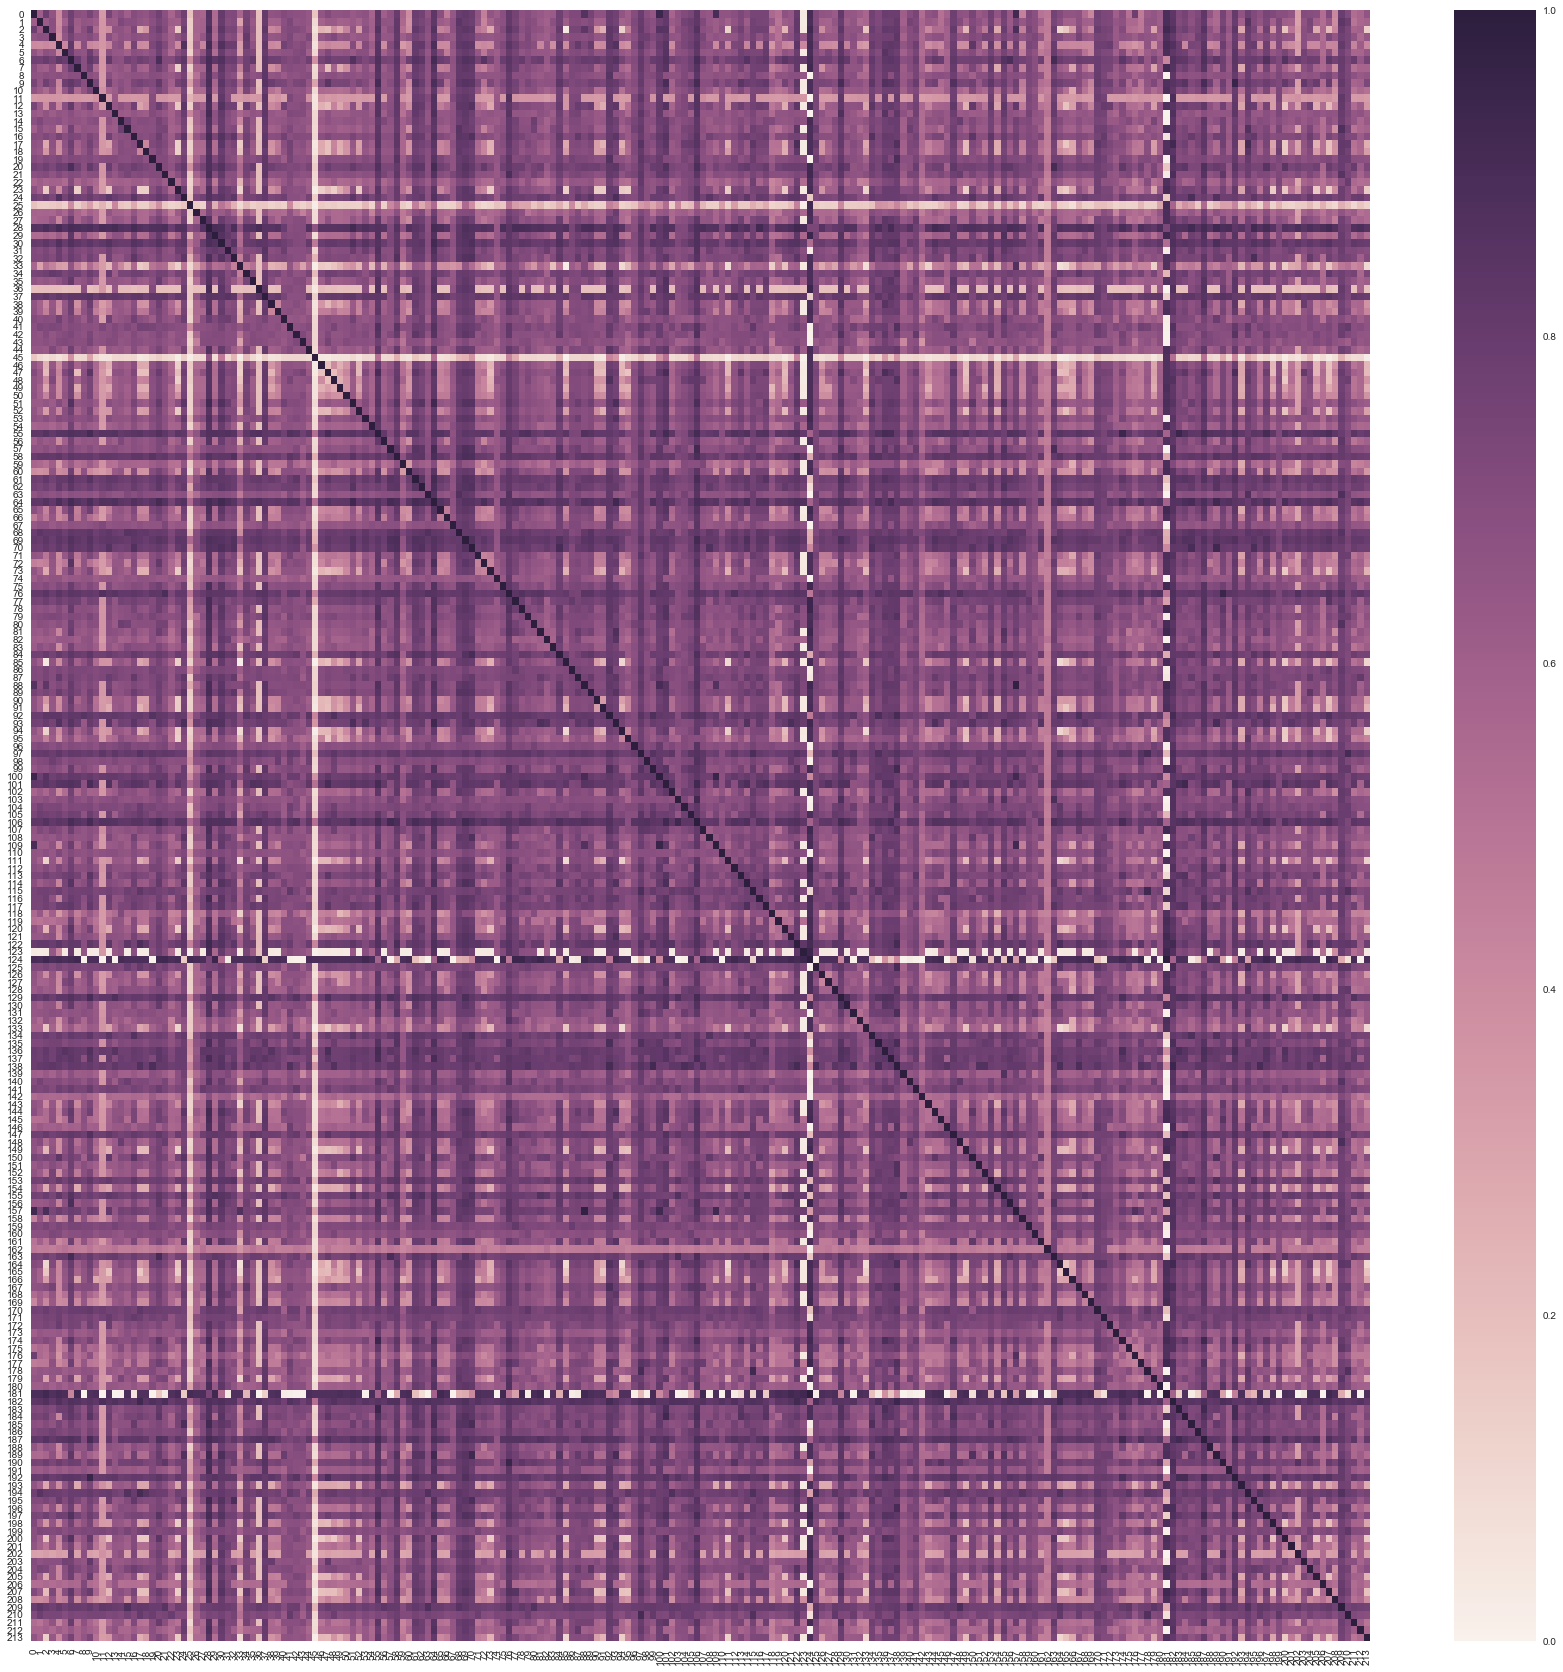

In [20]:
plt.figure(figsize=(30,30))
sns.heatmap(train_k)
plt.savefig('bla1.png')

In [25]:
fitted.score(train_k, y_train)

0.90654205607476634

In [26]:
fitted.n_support_

array([73, 20])

In [123]:
fitted

SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel=u'precomputed', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [146]:
pr = clf.predict(test_k)

In [147]:
pr[pr>0]

array([], dtype=float64)

In [23]:
y_score = fitted.decision_function(test)

In [ ]:
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])